#  <span style="color:#3366ff"> <strong> Segmenter le comportement de clients (Arnaud ROUSSEAU) </strong>

# <span style="color:#3366ff"> 2018 July 5th (Part 1: Database Cleaning)

<span style="color:#3366ff"> This notebook is dedicated to the database "Online Retail.xlsx" cleaning.

### Librairies Import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from collections import Counter

from sklearn import decomposition, preprocessing

### Database loading

In [2]:
data_client_raw = pd.read_excel('DATA/Online_Retail.xlsx', sep=';')

In [3]:
shapeclientraw = data_client_raw.shape

test = len(data_client_raw['InvoiceNo'].unique())

print("This database contains",shapeclientraw[0], 
      "purchases grouped in ", test,
      "transactions describe with", shapeclientraw[1], 
      "parameters (with empty cells).")

This database contains 541909 purchases grouped in  25900 transactions describe with 8 parameters (with empty cells).


In [4]:
pd.options.display.max_columns=999
data_client_raw.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
data_client_raw.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data_client_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

<span style="color:#3366ff"> <strong> InvoiceNo: </strong> Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

<span style="color:#3366ff"> <strong> StockCode: </strong> Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

<span style="color:#3366ff"> <strong> Description: </strong> Product (item) name. Nominal. 

<span style="color:#3366ff"> <strong> Quantity: </strong> The quantities of each product (item) per transaction. Numeric.	

<span style="color:#3366ff"> <strong> InvoiceDate: </strong> Invice Date and time. Numeric, the day and time when each transaction was generated. 

<span style="color:#3366ff"> <strong> UnitPrice: </strong> Unit price. Numeric, Product price per unit in sterling.

<span style="color:#3366ff"> <strong> CustomerID: </strong>  Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

<span style="color:#3366ff"> <strong> Country: </strong> Country name. Nominal, the name of the country where each customer resides.

<span style="color:#ff0000"> <strong> Note: </strong>

<span style="color:#3366ff"> "Stockcode" = "Description": Parameter "StockCode" will be skiped.    
 
<span style="color:#3366ff"> "CustomerID" : identify customers profiles.

# Description 

<strong> Nan frequency

In [7]:
data_client_raw.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

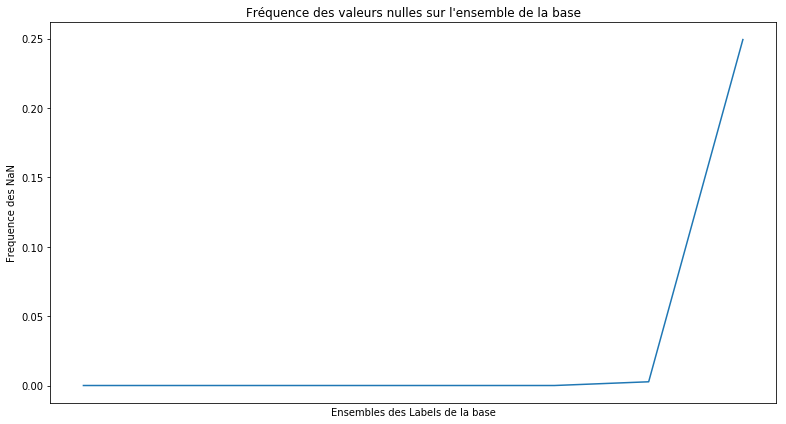

In [8]:
freq_null_raw = data_client_raw.isnull().mean().sort_values()

plt.figure(figsize=(13,7))

ax = plt.subplot()
ax.set_title("Fréquence des valeurs nulles sur l'ensemble de la base")
plt.ylabel("Frequence des NaN")
plt.xlabel("Ensembles des Labels de la base")
plt.xticks([]) 

plt.plot(freq_null_raw)

plt.show()

<strong> Nan Cleaning

In [9]:
# index
data_client = data_client_raw.dropna(axis = 0 , subset=['InvoiceNo']) 
#data_client = data_client.dropna(axis = 0 , subset=['StockCode']) 
#data_client = data_client.dropna(axis = 0 , subset=['Description']) 
data_client = data_client.dropna(axis = 0 , subset=['Quantity']) 
data_client = data_client.dropna(axis = 0 , subset=['InvoiceDate']) 
data_client = data_client.dropna(axis = 0 , subset=['UnitPrice']) 
data_client = data_client.dropna(axis = 0 , subset=['CustomerID'])
#data_client = data_client.dropna(axis = 0 , subset=['Country'])

In [10]:
data_client.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<span style="color:#3366ff"> Négative Quantity --> "cancellation" to be removed

In [11]:
data_client.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
shapeclient = data_client.shape

print("Cette base de données contient",shapeclient[0], 
      "achats décrits avec", shapeclient[1], "paramètres.")

Cette base de données contient 406829 achats décrits avec 8 paramètres.


<strong> Quantity

<span style="color:#3366ff"> Negative Values = cancellation --> removed

In [13]:
data_client = data_client[(data_client['Quantity']>0)]
data_client.shape
data_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [14]:
sum_Quanti = data_client['Quantity'].sort_values(ascending=False)
sum_Quanti = pd.DataFrame(sum_Quanti)
sum_Quanti.head(10)

,Quantity
540421,80995
61619,74215
502122,12540
421632,4800
206121,4300
97432,3906
270885,3186
160546,3114
52711,3114
433788,3000


<span style="color:#3366ff">  Retail involves big quantities, but the first seems to be way off range:     
    
<span style="color:#3366ff">      80995 has been cancelled: to be removed    
<span style="color:#3366ff">      74215 has been cancelled: to be removed    
<span style="color:#3366ff">      12540 has no price: to be removed     
<span style="color:#3366ff">      4800 is OK   

In [15]:
#Research of the line with outlier 80995

test = data_client['Quantity'] == 80995
test = test[test == True]
test.index.values

array([540421])

In [16]:
data_client= data_client.drop(index = 540421)

In [17]:
#Research of the line with outlier 74215

test = data_client['Quantity'] == 74215
test = test[test == True]
data_client= data_client.drop(index = test.index.values)

In [18]:
#Research of the line with outlier 12540

test = data_client['Quantity'] == 12540
test = test[test == True]
data_client= data_client.drop(index = test.index.values)

In [19]:
sum_Quanti = data_client['Quantity'].sort_values(ascending=False)
sum_Quanti = pd.DataFrame(sum_Quanti)
sum_Quanti.head(10)

,Quantity
421632,4800
206121,4300
97432,3906
270885,3186
52711,3114
160546,3114
433788,3000
291249,2880
4945,2880
201149,2700


<strong> InvoiceNo

In [20]:
data_client['InvoiceNo'].describe()

count     397921
unique     18533
top       576339
freq         542
Name: InvoiceNo, dtype: int64

<span style="color:#3366ff">  InvoiceNo with a C are for cancellation --> codes with C removed.

In [21]:
data_client['InvoiceNo'] = data_client['InvoiceNo'].apply(lambda x: pd.to_numeric(x, errors = 'coerce')).dropna()
data_client['InvoiceNo'].describe()

count    397921.000000
mean     560617.076626
std       13106.108225
min      536365.000000
25%      549234.000000
50%      561893.000000
75%      572090.000000
max      581587.000000
Name: InvoiceNo, dtype: float64

In [22]:
data_client['InvoiceNo'].describe()

count    397921.000000
mean     560617.076626
std       13106.108225
min      536365.000000
25%      549234.000000
50%      561893.000000
75%      572090.000000
max      581587.000000
Name: InvoiceNo, dtype: float64

In [23]:
data_client['InvoiceNo'] = data_client['InvoiceNo'][pd.to_numeric(data_client['InvoiceNo'], errors='coerce').notnull()]
data_client['InvoiceNo'].describe()

count    397921.000000
mean     560617.076626
std       13106.108225
min      536365.000000
25%      549234.000000
50%      561893.000000
75%      572090.000000
max      581587.000000
Name: InvoiceNo, dtype: float64

In [24]:
data_client = data_client.dropna(axis = 0 , subset=['InvoiceNo']) 

In [25]:
data_client['InvoiceNo'].describe()

count    397921.000000
mean     560617.076626
std       13106.108225
min      536365.000000
25%      549234.000000
50%      561893.000000
75%      572090.000000
max      581587.000000
Name: InvoiceNo, dtype: float64

<strong> Description

In [26]:
data_client['Description'].describe()

count                                 397921
unique                                  3876
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2028
Name: Description, dtype: object

<strong> Description = MANUAL

In [27]:
# Recherche des lignes "Manual" qui correspondent aux erreurs corrigées à la main

descr = data_client['Description'] == 'Manual'
descr = descr[descr == True]
len(descr)

290

In [28]:
descr.index

Int64Index([  2239,   2250,   6798,   7976,   8530,   8587,   8588,   9326,
              9575,  10113,
            ...
            504904, 514609, 517027, 517374, 524894, 526015, 526018, 530876,
            531432, 538321],
           dtype='int64', length=290)

In [29]:
for i in descr.index:    
    data_client['Description'] = data_client['Description'].drop(i)

In [30]:
# Recherche des lignes "Manual"

descr = data_client['Description'] == 'Manual'
descr = descr[descr == True]
len(descr)

0

<strong> Description = POSTAGE

# Recherche des lignes "POSTAGE" (qui correspondent à des frais d'envois ??)

descr = data_client['Description'] == 'POSTAGE'
descr = descr[descr == True]
len(descr)

descr.index

for i in descr.index:    
    data_client['Description'] = data_client['Description'].drop(i)

# Recherche des lignes "POSTAGE" (qui correspondent à des frais d'envois ??)

descr = data_client['Description'] == 'POSTAGE'
descr = descr[descr == True]
len(descr)

data_client = data_client.dropna(axis = 0 , subset=['Description']) 

shapeclient = data_client.shape

print("Cette base de données contient",shapeclient[0], 
      "achats décrits avec", shapeclient[1], "paramètres.")

<strong> StockCode

In [31]:
data_client['StockCode'].describe()

count     397921
unique      3664
top       85123A
freq        2035
Name: StockCode, dtype: object

In [32]:
# Recherche des lignes "M" pour Manual

stockco = data_client['StockCode'] == 'M'
stockco = stockco[stockco == True]
len(stockco)

290

In [33]:
stockco.index

Int64Index([  2239,   2250,   6798,   7976,   8530,   8587,   8588,   9326,
              9575,  10113,
            ...
            504904, 514609, 517027, 517374, 524894, 526015, 526018, 530876,
            531432, 538321],
           dtype='int64', length=290)

In [34]:
for i in stockco.index:    
    data_client['StockCode'] = data_client['StockCode'].drop(i)

In [35]:
data_client = data_client.dropna(axis = 0 , subset=['StockCode']) 

<strong> UnitPrice

In [36]:
data_client['UnitPrice'].describe()

count    397631.000000
mean          2.993264
std          14.949144
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

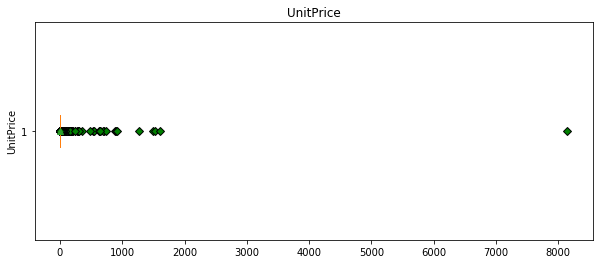

In [37]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('UnitPrice')
plt.ylabel("UnitPrice")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_client['UnitPrice'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

In [38]:
test = max(data_client['UnitPrice'])
test

8142.75

<span style="color:#3366ff"> This maximum seems to be an outlier: "Description" = Postage.
    
<span style="color:#3366ff"> Plus, it has been cancelled, to be removed.

In [39]:
#Research of the line with outlier 8142.75

test = data_client['UnitPrice'] == 8142.75
test = test[test == True]
data_client= data_client.drop(index = test.index.values)

In [40]:
data_client['UnitPrice'].describe()

count    397630.000000
mean          2.972794
std           7.539912
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        1599.260000
Name: UnitPrice, dtype: float64

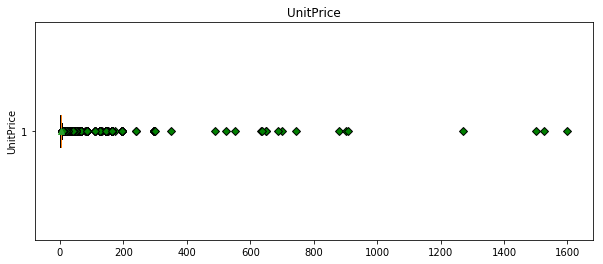

In [41]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('UnitPrice')
plt.ylabel("UnitPrice")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_client['UnitPrice'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

In [42]:
sum_Quanti = data_client['UnitPrice'].sort_values(ascending=False)
sum_Quanti = pd.DataFrame(sum_Quanti)
sum_Quanti.head(10)

,UnitPrice
528082,1599.26
508459,1526.76
467436,1500.36
494728,1270.06
455261,908.16
429588,901.58
350599,878.55
401766,743.62
236402,700.00
361584,688.08


<strong> StockCode

In [43]:
data_client['StockCode'].describe()

count     397630
unique      3663
top       85123A
freq        2035
Name: StockCode, dtype: object

<strong> InvoiceDate

In [44]:
data_client['InvoiceDate'].describe()

count                  397630
unique                  17227
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

<strong> CustomerID

In [45]:
data_client['CustomerID'].describe()

count    397630.000000
mean      15294.266464
std        1713.049046
min       12347.000000
25%       13969.000000
50%       15159.000000
75%       16795.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [46]:
len(data_client['CustomerID'].unique())

4334

<strong> Country

In [47]:
data_client['Country'].describe()

count             397630
unique                37
top       United Kingdom
freq              354090
Name: Country, dtype: object

<span style="color:#3366ff"> 

#  Analysis

<strong> Quantity / Date

In [48]:
test = data_client['InvoiceDate'][0].strftime('%Y%m%d%H%M')
test

'201012010826'

In [49]:
data_client['Date'] = data_client['InvoiceDate'].dt.strftime('%Y%m%d%H%M')   
data_client['Date'].head()

0    201012010826
1    201012010826
2    201012010826
3    201012010826
4    201012010826
Name: Date, dtype: object

<span style="color:#3366ff"> Creation of a different format for "InvoiceDate" --> "Date"

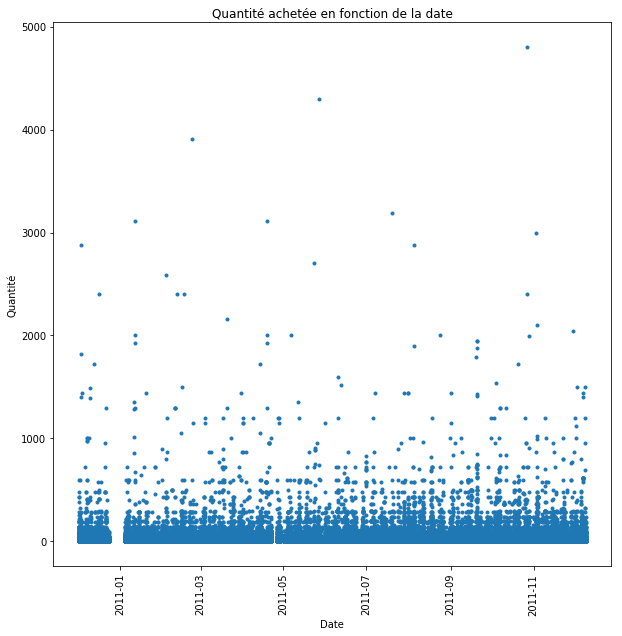

In [50]:
plt.figure(figsize=(10,10))

ax = plt.subplot()
ax.set_title("Quantité achetée en fonction de la date")
plt.ylabel("Quantité")
plt.xlabel("Date")
plt.xticks(rotation='vertical')  

plt.plot_date(data_client['InvoiceDate'],data_client['Quantity'], marker='.') 

plt.show()

<strong> Quantity / Customers ID

In [51]:
test = max(data_client['Quantity'])
test

4800

<span style="color:#3366ff"> Some are big customers

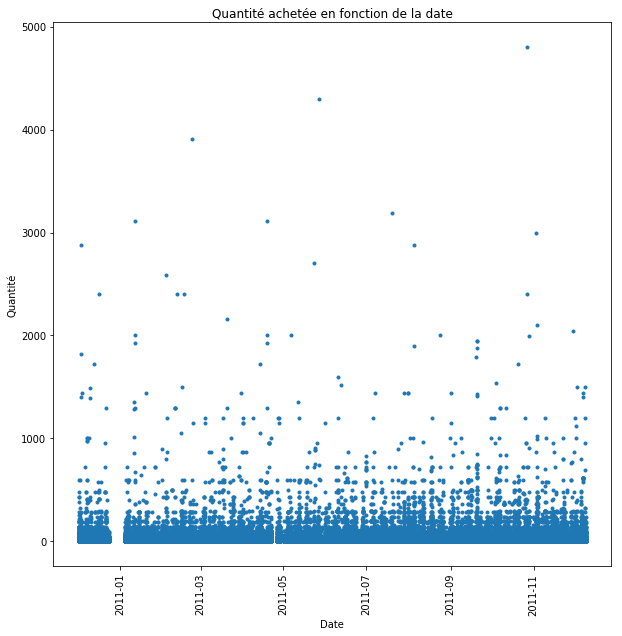

In [52]:
plt.figure(figsize=(10,10))

ax = plt.subplot()
ax.set_title("Quantité achetée en fonction de la date")
plt.ylabel("Quantité")
plt.xlabel("Date")
plt.xticks(rotation='vertical')  

plt.plot_date(data_client['InvoiceDate'],data_client['Quantity'], marker='.') 

plt.show()

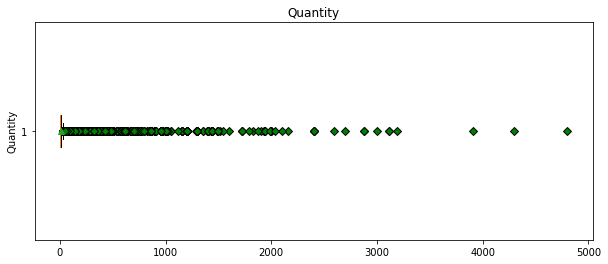

In [53]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('Quantity')
plt.ylabel("Quantity")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_client['Quantity'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

<strong> InvoiceDate / UnitPrice

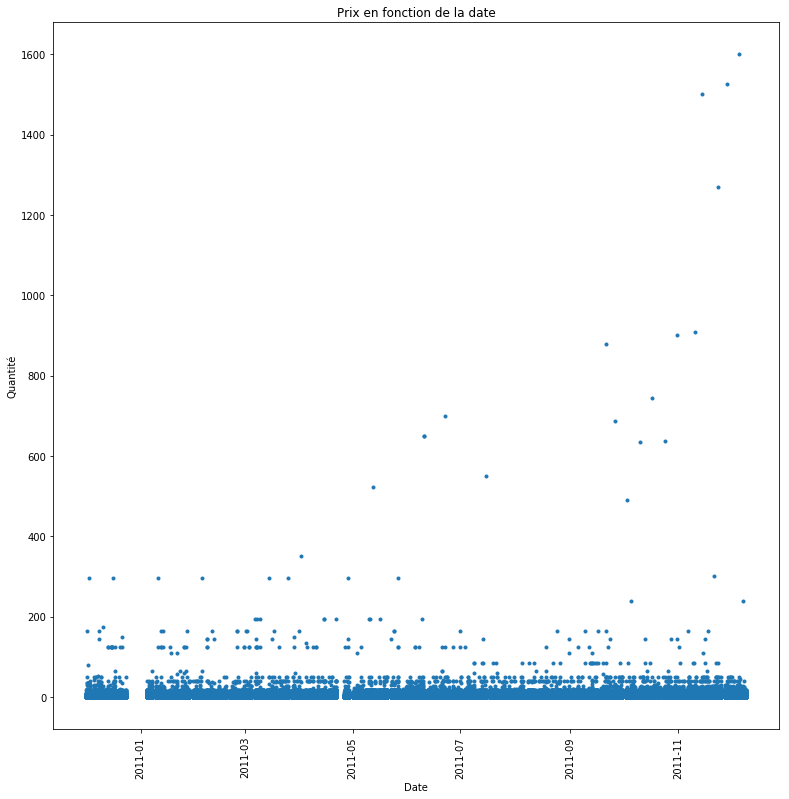

In [54]:
plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title("Prix en fonction de la date")
plt.ylabel("Quantité")
plt.xlabel("Date")
plt.xticks(rotation='vertical')  

plt.plot_date(data_client['InvoiceDate'],data_client['UnitPrice'], marker='.') 

plt.show()

In [55]:
test = max(data_client['UnitPrice'])
test

1599.26

<span style="color:#3366ff"> It seems that some customers (but not all) spend more money at the end of the year (chistmas).

<strong> Frequency Analysis: "Description" (= Product Name)

In [56]:
freq_string = Counter(data_client['Description'])
freq_string = pd.DataFrame.from_dict(freq_string, orient='index').reset_index()
freq_string = freq_string.sort_values(by=[0], ascending=False)

freq_string = freq_string.dropna(axis = 0) 

In [57]:
# la nouvelle base mesure:
shape = freq_string.shape

print("This database contains",shape[0],"products.")

This database contains 3875 products.


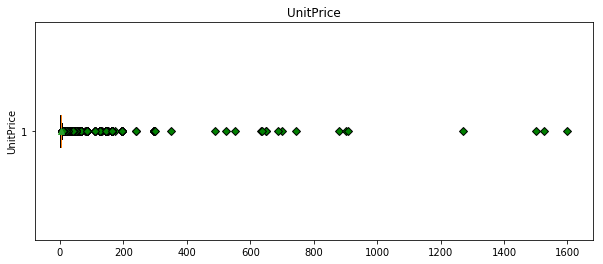

In [58]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.set_title('UnitPrice')
plt.ylabel("UnitPrice")

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(data_client['UnitPrice'], showmeans=True, vert=False, showfliers= True, flierprops=green_diamond)
plt.show()

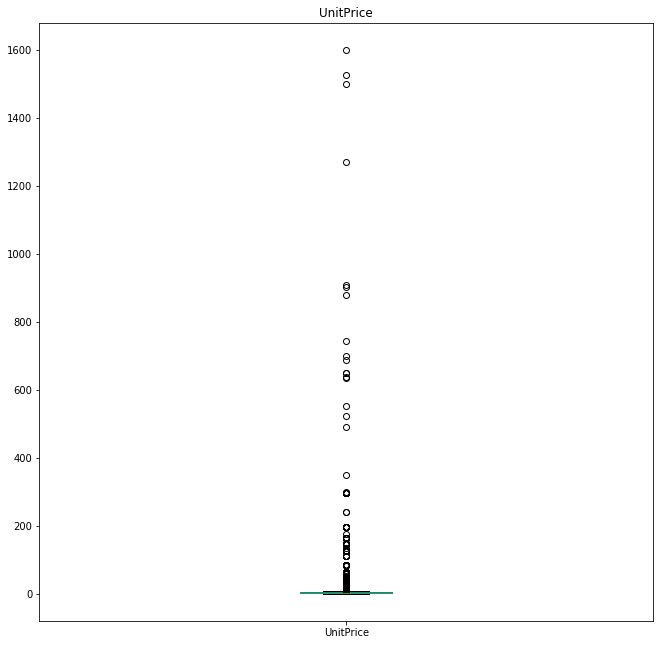

In [59]:
data_client['UnitPrice'].plot(kind='box', 
                              figsize =(11,11),
                              title = 'UnitPrice'
)

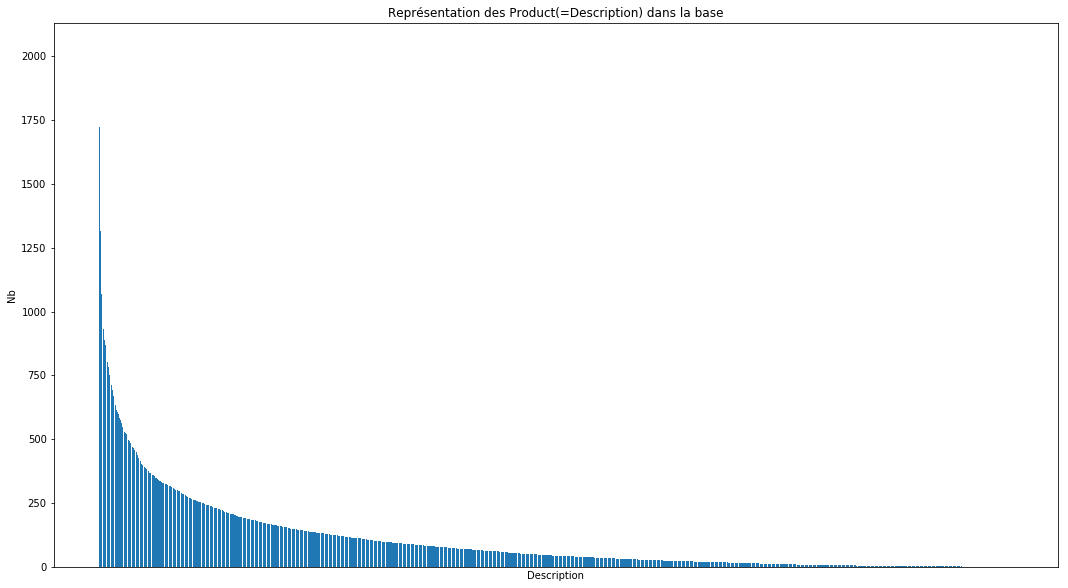

In [60]:
plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.set_title("Représentation des Product(=Description) dans la base")
plt.xlabel('Description') 
plt.ylabel("Nb") 
plt.xticks([])    

plt.bar(freq_string['index'],freq_string[0])
plt.show()

In [61]:
freq_string.head(10)

,index,0
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
529,REGENCY CAKESTAND 3 TIER,1724
138,JUMBO BAG RED RETROSPOT,1618
9,ASSORTED COLOUR BIRD ORNAMENT,1408
1385,PARTY BUNTING,1397
66,LUNCH BAG RED RETROSPOT,1316
2148,SET OF 3 CAKE TINS PANTRY DESIGN,1159
289,LUNCH BAG BLACK SKULL.,1105
45,POSTAGE,1098
69,PACK OF 72 RETROSPOT CAKE CASES,1068


<strong> PCA sur Description

In [62]:
Description_dumm = pd.get_dummies(data_client['Description'].astype(str), prefix='PROD')
Description_dumm.head()

,PROD_ 4 PURPLE FLOCK DINNER CANDLES,PROD_ 50'S CHRISTMAS GIFT BAG LARGE,PROD_ DOLLY GIRL BEAKER,PROD_ I LOVE LONDON MINI BACKPACK,PROD_ I LOVE LONDON MINI RUCKSACK,PROD_ NINE DRAWER OFFICE TIDY,PROD_ OVAL WALL MIRROR DIAMANTE,PROD_ RED SPOT GIFT BAG LARGE,PROD_ SET 2 TEA TOWELS I LOVE LONDON,PROD_ SPACEBOY BABY GIFT SET,PROD_ TOADSTOOL BEDSIDE LIGHT,PROD_ TRELLIS COAT RACK,PROD_10 COLOUR SPACEBOY PEN,PROD_12 COLOURED PARTY BALLOONS,PROD_12 DAISY PEGS IN WOOD BOX,PROD_12 EGG HOUSE PAINTED WOOD,PROD_12 HANGING EGGS HAND PAINTED,PROD_12 IVORY ROSE PEG PLACE SETTINGS,PROD_12 MESSAGE CARDS WITH ENVELOPES,PROD_12 PENCIL SMALL TUBE WOODLAND,PROD_12 PENCILS SMALL TUBE RED RETROSPOT,PROD_12 PENCILS SMALL TUBE SKULL,PROD_12 PENCILS TALL TUBE POSY,PROD_12 PENCILS TALL TUBE RED RETROSPOT,PROD_12 PENCILS TALL TUBE SKULLS,PROD_12 PENCILS TALL TUBE WOODLAND,PROD_12 PINK HEN+CHICKS IN BASKET,PROD_12 PINK ROSE PEG PLACE SETTINGS,PROD_12 RED ROSE PEG PLACE SETTINGS,PROD_15 PINK FLUFFY CHICKS IN BOX,PROD_15CM CHRISTMAS GLASS BALL 20 LIGHTS,PROD_16 PC CUTLERY SET PANTRY DESIGN,PROD_16 PIECE CUTLERY SET PANTRY DESIGN,PROD_18PC WOODEN CUTLERY SET DISPOSABLE,PROD_2 DAISIES HAIR COMB,PROD_2 PICTURE BOOK EGGS EASTER BUNNY,PROD_2 PICTURE BOOK EGGS EASTER CHICKS,PROD_2 PICTURE BOOK EGGS EASTER DUCKS,PROD_20 DOLLY PEGS RETROSPOT,PROD_200 BENDY SKULL STRAWS,PROD_200 RED + WHITE BENDY STRAWS,PROD_3 BIRDS CANVAS SCREEN,PROD_3 BLACK CATS W HEARTS BLANK CARD,PROD_3 DRAWER ANTIQUE WHITE WOOD CABINET,PROD_3 GARDENIA MORRIS BOXED CANDLES,PROD_3 HEARTS HANGING DECORATION RUSTIC,PROD_3 HOOK HANGER MAGIC GARDEN,PROD_3 HOOK PHOTO SHELF ANTIQUE WHITE,PROD_3 PIECE SPACEBOY COOKIE CUTTER SET,PROD_3 PINK HEN+CHICKS IN BASKET,PROD_3 RAFFIA RIBBONS 50'S CHRISTMAS,PROD_3 RAFFIA RIBBONS VINTAGE CHRISTMAS,PROD_3 ROSE MORRIS BOXED CANDLES,PROD_3 STRIPEY MICE FELTCRAFT,PROD_3 TIER CAKE TIN GREEN AND CREAM,PROD_3 TIER CAKE TIN RED AND CREAM,PROD_3 TIER SWEETHEART GARDEN SHELF,PROD_3 TRADITIONAL COOKIE CUTTERS SET,PROD_3 TRADITIONAl BISCUIT CUTTERS SET,PROD_3 WHITE CHOC MORRIS BOXED CANDLES,PROD_3 WICK CHRISTMAS BRIAR CANDLE,PROD_36 DOILIES DOLLY GIRL,PROD_36 DOILIES VINTAGE CHRISTMAS,PROD_36 FOIL HEART CAKE CASES,PROD_36 FOIL STAR CAKE CASES,PROD_36 PENCILS TUBE POSY,PROD_36 PENCILS TUBE RED RETROSPOT,PROD_36 PENCILS TUBE SKULLS,PROD_36 PENCILS TUBE WOODLAND,PROD_3D CHRISTMAS STAMPS STICKERS,PROD_3D DOG PICTURE PLAYING CARDS,PROD_3D HEARTS HONEYCOMB PAPER GARLAND,PROD_3D SHEET OF CAT STICKERS,PROD_3D SHEET OF DOG STICKERS,PROD_3D TRADITIONAL CHRISTMAS STICKERS,PROD_3D VINTAGE CHRISTMAS STICKERS,PROD_4 BLUE DINNER CANDLES SILVER FLOCK,PROD_4 BURGUNDY WINE DINNER CANDLES,PROD_4 IVORY DINNER CANDLES SILVER FLOCK,PROD_4 LAVENDER BOTANICAL DINNER CANDLES,PROD_4 LILY BOTANICAL DINNER CANDLES,PROD_4 PEAR BOTANICAL DINNER CANDLES,PROD_4 PINK DINNER CANDLE SILVER FLOCK,PROD_4 PINK FLOCK CHRISTMAS BALLS,PROD_4 ROSE PINK DINNER CANDLES,PROD_4 SKY BLUE DINNER CANDLES,PROD_4 TRADITIONAL SPINNING TOPS,PROD_4 VANILLA BOTANICAL CANDLES,PROD_4 WILDFLOWER BOTANICAL CANDLES,PROD_5 HOOK HANGER MAGIC TOADSTOOL,PROD_5 HOOK HANGER RED MAGIC TOADSTOOL,PROD_5 STRAND GLASS NECKLACE AMBER,PROD_5 STRAND GLASS NECKLACE AMETHYST,PROD_5 STRAND GLASS NECKLACE BLACK,PROD_5 STRAND GLASS NECKLACE CRYSTAL,PROD_50'S CHRISTMAS PAPER GIFT BAG,PROD_50CM METAL STRING WITH 7 CLIPS,PROD_6 CHOCOLATE LOVE HEART T-LIGHTS,PROD_6 EGG HOUSE PAINTED WOOD,PROD_6 GIFT TAGS 50'S CHRISTMAS,PROD_6 GIFT TAGS VINTAGE CHRISTMAS,PROD_6 RIBBONS ELEGANT CHRISTMAS,PROD_6 RIBBONS EMPIRE,PROD_6 RIBBONS RUSTIC CHARM,PROD_6 RIBBONS SHIMMERING PINKS,PROD_6 ROCKET BALLOONS,PROD_60 CAKE CASES DOLLY GIRL DESIGN,PROD_60 CAKE CASES VINTAGE CHRISTMAS,PROD_60 GOLD AND SILVER FAIRY CAKE CASES,PROD_60 TEATIME FAIRY CAKE CASES,PROD_6PC WOOD PLATE SET DISPOSABLE,PROD_70'S ALPHABET WALL ART,PROD_72 CAKE CASES VINTAGE CHRISTMAS,PROD_72 SWEETHEART FAIRY CAKE CASES,PROD_75 BLACK PETIT FOUR CASES,PROD_75 GREEN FAIRY CAKE CASES,PROD_75 GREEN PETIT FOUR CASES,

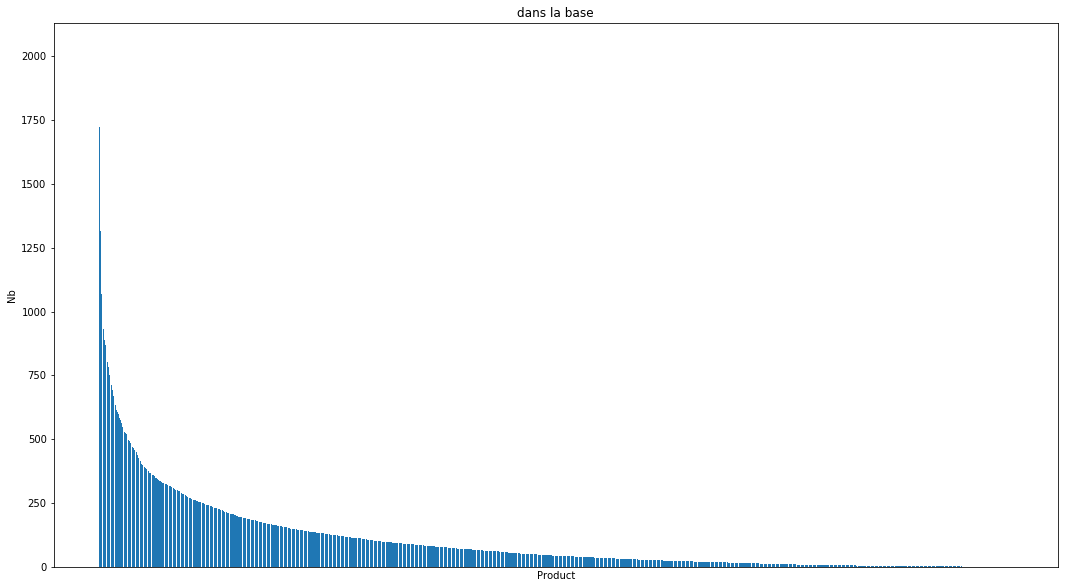

In [63]:
plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.set_title("dans la base")
plt.xlabel('Product') 
plt.ylabel("Nb") 
plt.xticks([])   

sum_Prod = Description_dumm.sum().sort_values(ascending=False)
sum_Prod = pd.DataFrame(sum_Prod)
plt.bar(sum_Prod.index,sum_Prod[0])
plt.show()

In [64]:
# Conservation de Produits présents au moins 500 fois.
sum_Prod_s = sum_Prod>510
sum_Prod_s.head(10)

,0
PROD_WHITE HANGING HEART T-LIGHT HOLDER,True
PROD_REGENCY CAKESTAND 3 TIER,True
PROD_JUMBO BAG RED RETROSPOT,True
PROD_ASSORTED COLOUR BIRD ORNAMENT,True
PROD_PARTY BUNTING,True
PROD_LUNCH BAG RED RETROSPOT,True
PROD_SET OF 3 CAKE TINS PANTRY DESIGN,True
PROD_LUNCH BAG BLACK SKULL.,True
PROD_POSTAGE,True
PROD_PACK OF 72 RETROSPOT CAKE CASES,True


In [65]:
shapesum_Prod_s = sum_Prod_s.shape

print("Cette base de données contient",shapesum_Prod_s[0],"Produits")

Cette base de données contient 3875 Produits


In [66]:
sum_Prod_s =sum_Prod_s[sum_Prod_s[0]==True]

In [67]:
sum_Prod_s.index

Index(['PROD_WHITE HANGING HEART T-LIGHT HOLDER',
       'PROD_REGENCY CAKESTAND 3 TIER', 'PROD_JUMBO BAG RED RETROSPOT',
       'PROD_ASSORTED COLOUR BIRD ORNAMENT', 'PROD_PARTY BUNTING',
       'PROD_LUNCH BAG RED RETROSPOT',
       'PROD_SET OF 3 CAKE TINS PANTRY DESIGN ',
       'PROD_LUNCH BAG  BLACK SKULL.', 'PROD_POSTAGE',
       'PROD_PACK OF 72 RETROSPOT CAKE CASES',
       ...
       'PROD_CHILLI LIGHTS', 'PROD_TRADITIONAL KNITTING NANCY',
       'PROD_WOOD 2 DRAWER CABINET WHITE FINISH', 'PROD_DOORMAT UNION FLAG',
       'PROD_HOT WATER BOTTLE TEA AND SYMPATHY',
       'PROD_HOMEMADE JAM SCENTED CANDLES',
       'PROD_HOT WATER BOTTLE I AM SO POORLY',
       'PROD_STRAWBERRY CERAMIC TRINKET BOX',
       'PROD_PACK OF 72 SKULL CAKE CASES',
       'PROD_SET OF 20 VINTAGE CHRISTMAS NAPKINS'],
      dtype='object', length=121)

In [68]:
Prod_OK = Description_dumm.filter(items=(sum_Prod_s.index))
Prod_OK.head()

,PROD_WHITE HANGING HEART T-LIGHT HOLDER,PROD_REGENCY CAKESTAND 3 TIER,PROD_JUMBO BAG RED RETROSPOT,PROD_ASSORTED COLOUR BIRD ORNAMENT,PROD_PARTY BUNTING,PROD_LUNCH BAG RED RETROSPOT,PROD_SET OF 3 CAKE TINS PANTRY DESIGN,PROD_LUNCH BAG BLACK SKULL.,PROD_POSTAGE,PROD_PACK OF 72 RETROSPOT CAKE CASES,PROD_PAPER CHAIN KIT 50'S CHRISTMAS,PROD_SPOTTY BUNTING,PROD_LUNCH BAG SPACEBOY DESIGN,PROD_LUNCH BAG CARS BLUE,PROD_HEART OF WICKER SMALL,PROD_NATURAL SLATE HEART CHALKBOARD,PROD_LUNCH BAG PINK POLKADOT,PROD_REX CASH+CARRY JUMBO SHOPPER,PROD_LUNCH BAG SUKI DESIGN,PROD_ALARM CLOCK BAKELIKE RED,PROD_LUNCH BAG APPLE DESIGN,PROD_SET OF 4 PANTRY JELLY MOULDS,PROD_JUMBO BAG PINK POLKADOT,PROD_JAM MAKING SET WITH JARS,PROD_WOODEN PICTURE FRAME WHITE FINISH,PROD_JAM MAKING SET PRINTED,PROD_BAKING SET 9 PIECE RETROSPOT,PROD_RECIPE BOX PANTRY YELLOW DESIGN,PROD_RABBIT NIGHT LIGHT,PROD_LUNCH BAG WOODLAND,PROD_RETROSPOT TEA SET CERAMIC 11 PC,PROD_VICTORIAN GLASS HANGING T-LIGHT,PROD_WOODEN FRAME ANTIQUE WHITE,PROD_HEART OF WICKER LARGE,PROD_ALARM CLOCK BAKELIKE GREEN,PROD_JUMBO SHOPPER VINTAGE RED PAISLEY,PROD_ROSES REGENCY TEACUP AND SAUCER,PROD_JUMBO STORAGE BAG SUKI,PROD_SET/5 RED RETROSPOT LID GLASS BOWLS,PROD_JUMBO BAG VINTAGE LEAF,PROD_GARDENERS KNEELING PAD KEEP CALM,PROD_JUMBO BAG ALPHABET,PROD_SET/20 RED RETROSPOT PAPER NAPKINS,PROD_RED RETROSPOT CHARLOTTE BAG,PROD_6 RIBBONS RUSTIC CHARM,PROD_HOT WATER BOTTLE KEEP CALM,PROD_VINTAGE SNAP CARDS,PROD_SET OF 3 REGENCY CAKE TINS,PROD_JUMBO BAG APPLES,PROD_SPACEBOY LUNCH BOX,PROD_GREEN REGENCY TEACUP AND SAUCER,PROD_CHOCOLATE HOT WATER BOTTLE,PROD_PAPER CHAIN KIT VINTAGE CHRISTMAS,PROD_PLEASE ONE PERSON METAL SIGN,PROD_HOME BUILDING BLOCK WORD,PROD_RED HANGING HEART T-LIGHT HOLDER,PROD_60 TEATIME FAIRY CAKE CASES,PROD_PACK OF 60 PINK PAISLEY CAKE CASES,PROD_SET OF 6 SPICE TINS PANTRY DESIGN,PROD_SCOTTIE DOG HOT WATER BOTTLE,PROD_LUNCH BAG ALPHABET DESIGN,PROD_GIN + TONIC DIET METAL SIGN,PROD_JUMBO BAG STRAWBERRY,PROD_JUMBO BAG BAROQUE BLACK WHITE,PROD_POPCORN HOLDER,PROD_DOORMAT KEEP CALM AND COME IN,PROD_GARDENERS KNEELING PAD CUP OF TEA,PROD_CLOTHES PEGS RETROSPOT PACK 24,PROD_DOLLY GIRL LUNCH BOX,PROD_IVORY KITCHEN SCALES,PROD_JUMBO BAG VINTAGE DOILY,PROD_ALARM CLOCK BAKELIKE PINK,PROD_LUNCH BAG VINTAGE LEAF DESIGN,PROD_LUNCH BAG DOLLY GIRL DESIGN,PROD_COOK WITH WINE METAL SIGN,PROD_ROUND SNACK BOXES SET OF4 WOODLAND,PROD_WOOD BLACK BOARD ANT WHITE FINISH,PROD_JUMBO BAG PINK VINTAGE PAISLEY,PROD_PLASTERS IN TIN WOODLAND ANIMALS,PROD_SMALL WHITE HEART OF WICKER,PROD_JUMBO BAG 50'S CHRISTMAS,PROD_CHARLOTTE BAG SUKI DESIGN,PROD_HAND OVER THE CHOCOLATE SIGN,PROD_HAND WARMER OWL DESIGN,PROD_PLASTERS IN TIN SPACEBOY,PROD_GUMBALL COAT RACK,PROD_PINK REGENCY TEACUP AND SAUCER,PROD_HANGING HEART JAR T-LIGHT HOLDER,PROD_LOVE BUILDING BLOCK WORD,PROD_DOORMAT RED RETROSPOT,PROD_PAPER BUNTING RETROSPOT,PROD_GINGERBREAD MAN COOKIE CUTTER,PROD_RED HARMONICA IN BOX,PROD_PACK OF 60 DINOSAUR CAKE CASES,PROD_PACK OF 20 NAPKINS PANTRY DESIGN,PROD_LUNCH BAG VINTAGE DOILY,PROD_PINK CREAM FELT CRAFT TRINKET BOX,PROD_RETROSPOT HEART HOT WATER BOTTLE,PROD_WOODLAND CHARLOTTE BAG,PROD_ANTIQUE SILVER T-LIGHT GLASS,PROD_GREY HEART HOT WATER BOTTLE,PROD_DOORMAT NEW ENGLAND,PROD_COLOUR GLASS T-LIGHT HOLDER HANGING,PROD_RED TOADSTOOL LED NIGHT LIGHT,PROD_SET OF 3 HEART COOKIE CUTTERS,PROD_72 SWEETHEART FAIRY CAKE CASES,PROD_PLASTERS IN TIN CIRCUS PARADE,PROD_SET OF 60 PANTRY DESIGN CAKE CASES,PROD_LUNCH BOX I LOVE LONDON,PROD_LARGE WHITE HEART OF WICKER,PROD_BLUE HARMONICA IN BOX,PROD_CHILLI LIGHTS,PROD_TRADITIONAL KNITTING NANCY,PROD_WOOD 2 DRAWER CABINET WHITE FINISH,PROD_DOORMAT UNION FLAG,PROD_HOT WATER BOTTLE TEA AND SYMPATHY,PROD_HOMEMADE JAM SCENTED CANDLES,PROD_HOT WATER BOTTLE I AM SO POORLY,PROD_STRAWBERRY CERAMIC TRINKET BOX,PROD_PACK OF 72 SKULL CAKE CASES,PROD_SET OF 20 VINTAGE CHRISTMAS NAPKINS
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [69]:
# preprocessing
Prod_OK_prepro = preprocessing.scale(Prod_OK)

pca = decomposition.PCA(n_components=2)
pca.fit(Prod_OK_prepro)

print("Variance des 2 premieres composantes principales", 
      pca.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.00828213 0.01656404]


In [70]:
Prod_OK_prepro_trans= pca.transform(Prod_OK_prepro)

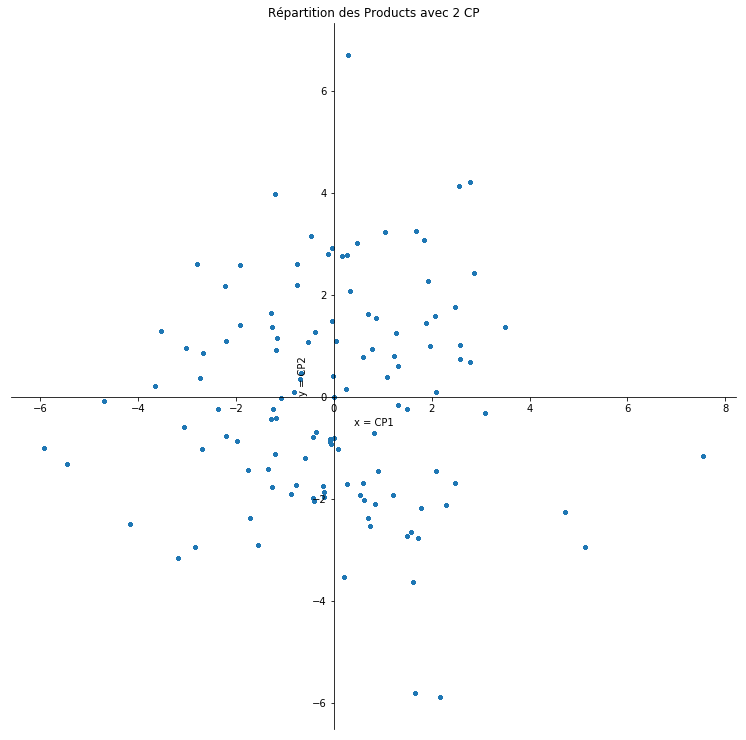

In [71]:
ig = plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title('Répartition des Products avec 2 CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(Prod_OK_prepro_trans[:,0], Prod_OK_prepro_trans[:,1], marker='.')

(-0.25, 0.35)

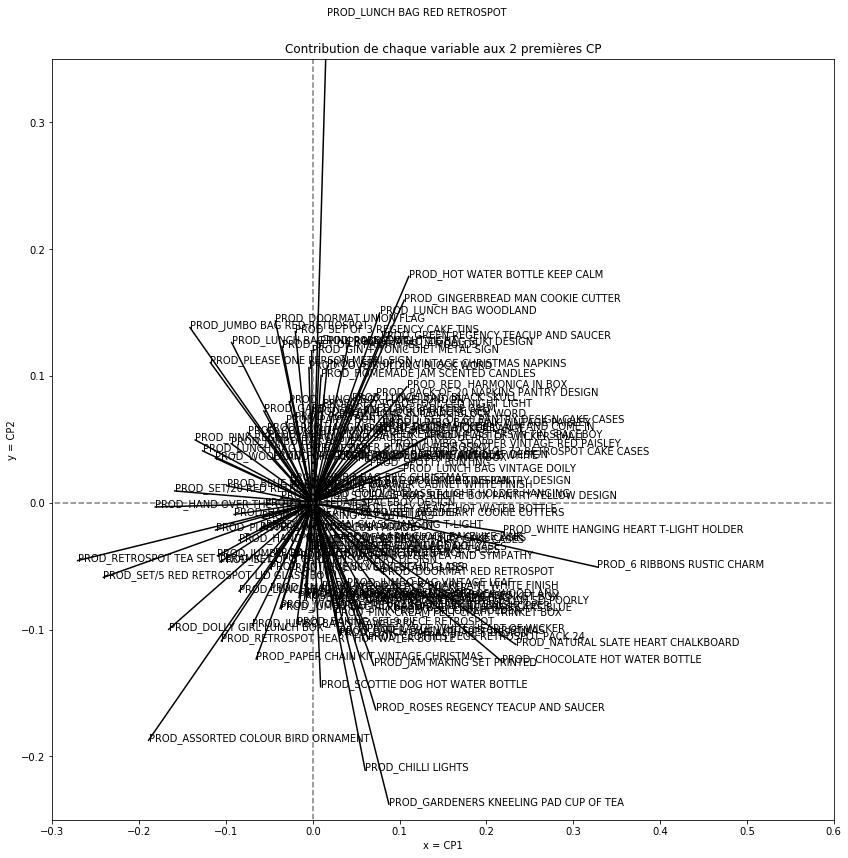

In [72]:
pcs = pca.components_

fig = plt.figure(figsize=(14,14))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, Prod_OK.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.3, 0.6])
plt.ylim([-0.25, 0.35])

<strong> Analysis: "Country"

In [73]:
data_client['TotalAmount'] = data_client['Quantity'] * data_client['UnitPrice']

In [74]:
avg_quan_count = data_client[['Quantity','TotalAmount','Country']]
avg_quan_count = avg_quan_count.groupby('Country').mean()
avg_quan_count.head()

,Quantity,TotalAmount
Country,,
Australia,71.062447,116.895620
Austria,12.263819,25.624824
Bahrain,15.294118,32.258824
Belgium,11.441162,20.283772
Brazil,11.125000,35.737500


Text(0.5,0,'Countries')

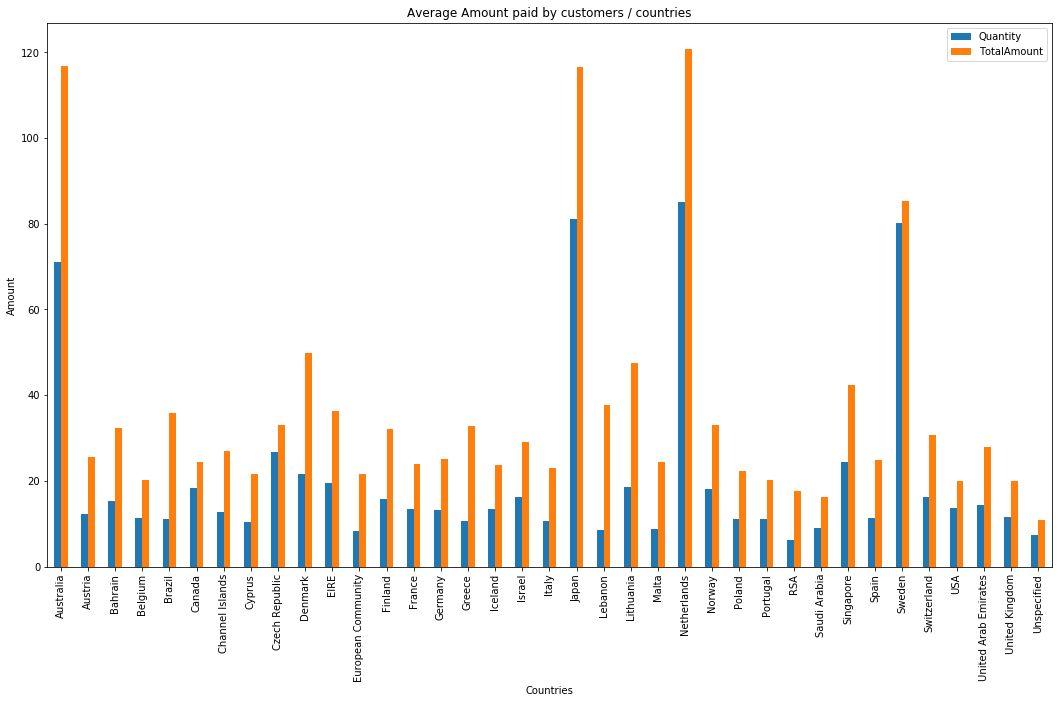

In [75]:
avg_quan_count.plot(kind='bar',
                figsize=(18,10),
                title='Average Amount paid by customers / countries')

plt.ylabel('Amount')
plt.xlabel('Countries')

<strong> Total sales at each country

In [76]:
test2 = data_client[['Quantity','TotalAmount','Country']]
country_df = test2.groupby(['Country']).sum()
country_df.sort_values('TotalAmount',ascending=False,inplace=True)
country_df.head()

,Quantity,TotalAmount
Country,,
United Kingdom,4094584,7.034397e+06
Netherlands,200937,2.854463e+05
EIRE,140523,2.621716e+05
Germany,119254,2.265709e+05
France,111465,1.995317e+05


Text(0.5,0,'Countries')

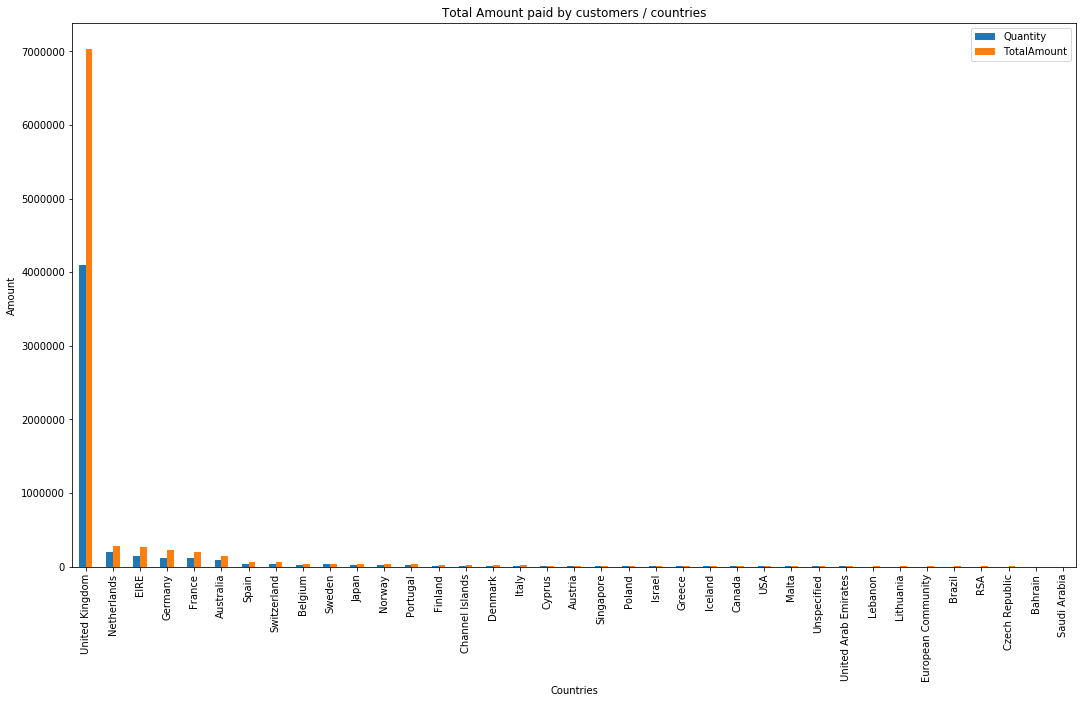

In [77]:
country_df.plot(kind='bar',
                figsize=(18,10),
                title='Total Amount paid by customers / countries')
plt.ylabel('Amount')
plt.xlabel('Countries')

<strong> Average of paid amount by each customer at each country ordered by number of invoices.

In [78]:
avg_cus = data_client[['Quantity','TotalAmount','Country','InvoiceNo']].copy()

x = avg_cus.groupby(['Country','InvoiceNo']).sum()
x['Transactions']=1

y = x.groupby('Country').sum()
y['Average_Money_pCustomers'] = y['TotalAmount'] / y['Transactions']
y.sort_values(['Transactions','Average_Money_pCustomers'],ascending=False,inplace=True)
y.head()

,Quantity,TotalAmount,Transactions,Average_Money_pCustomers
Country,,,,
United Kingdom,4094584,7034396.664,16605,423.631235
Germany,119254,226570.890,451,502.374479
France,111465,199531.680,385,518.264104
EIRE,140523,262171.560,258,1016.168837
Belgium,23237,41196.340,98,420.370816


Text(0.5,0,'Countries')

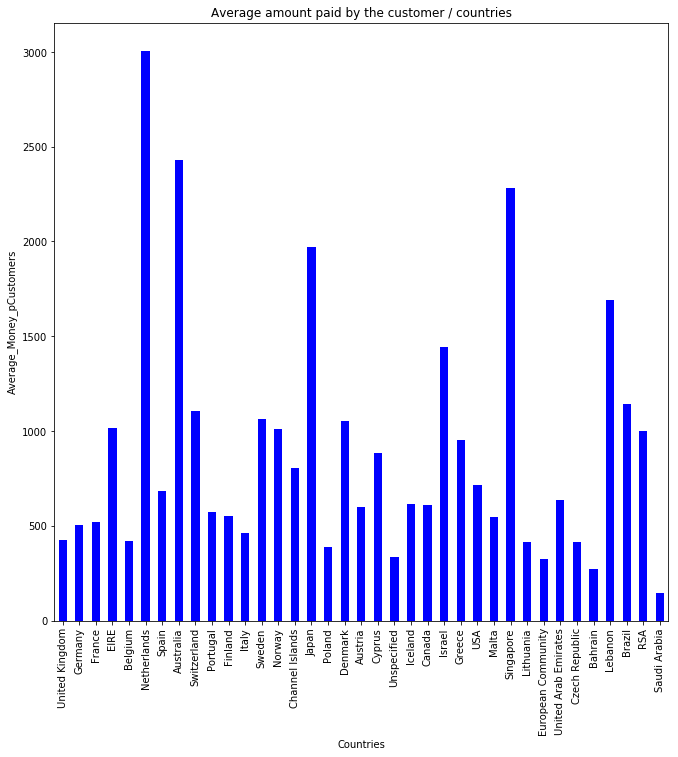

In [79]:
y['Average_Money_pCustomers'].plot(kind='bar',
              figsize=(11,11),
              title='Average amount paid by the customer / countries',
             color = "blue" )
plt.ylabel('Average_Money_pCustomers')
plt.xlabel('Countries')

<strong> Country frequency

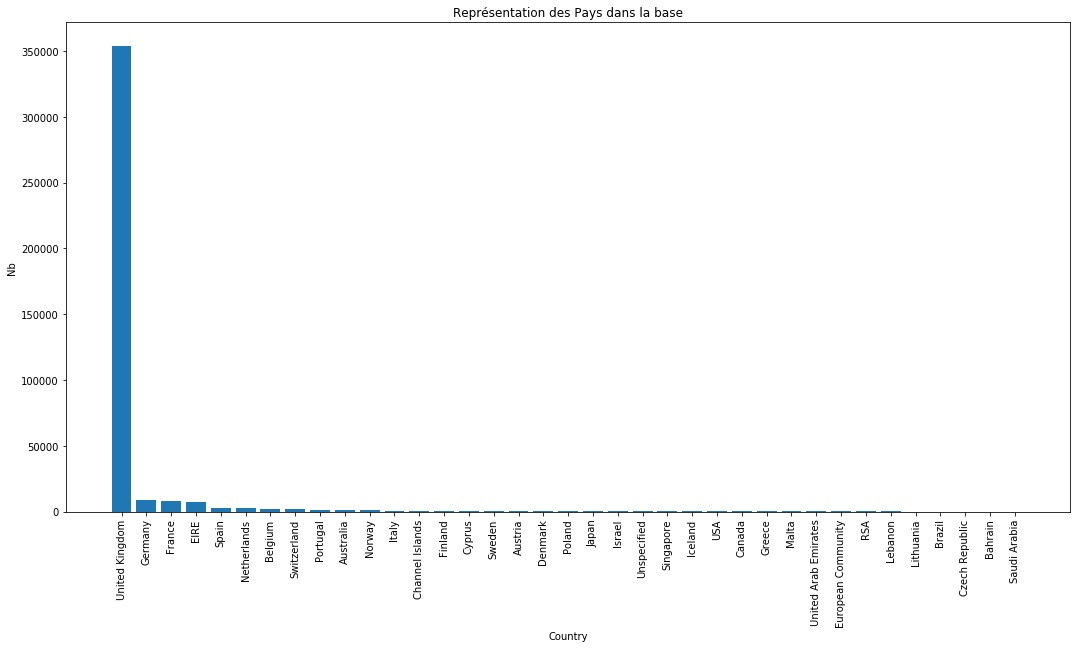

In [80]:
plt.figure(figsize=(18,9))
ax = plt.subplot()
ax.set_title("Représentation des Pays dans la base")
plt.xlabel('Country') 
plt.ylabel("Nb") 
plt.xticks(rotation='vertical')      

freq_string = Counter(data_client['Country'])
freq_string = pd.DataFrame.from_dict(freq_string, orient='index').reset_index()
freq_string = freq_string.sort_values(by=[0], ascending=False)

plt.bar(freq_string['index'],freq_string[0])
plt.show()

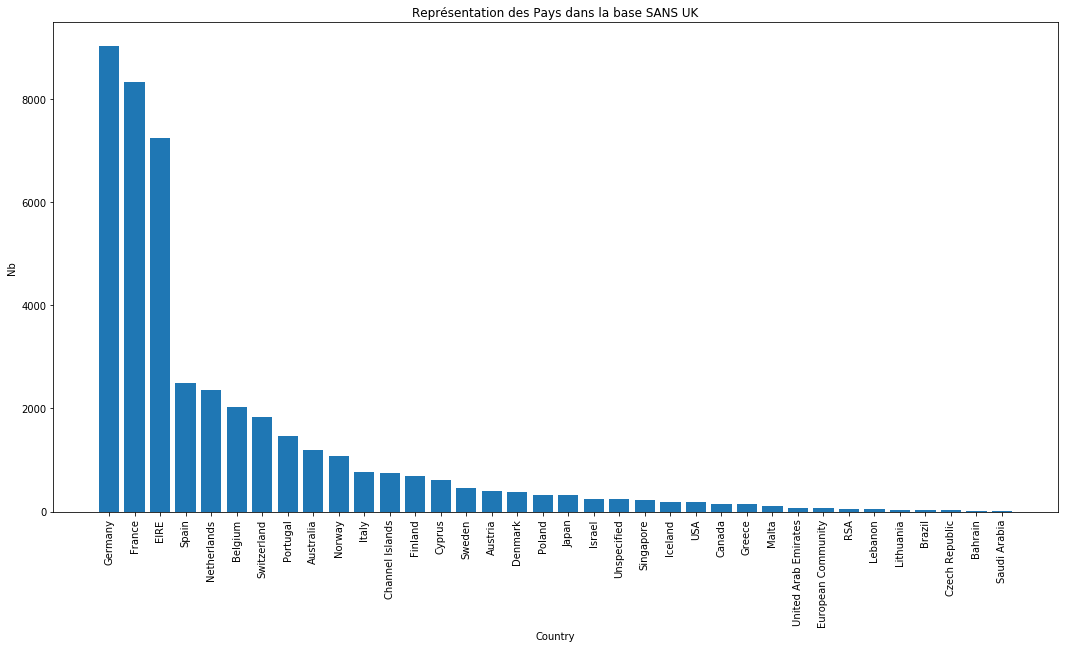

In [81]:
plt.figure(figsize=(18,9))
ax = plt.subplot()
ax.set_title("Représentation des Pays dans la base SANS UK")
plt.xlabel('Country') 
plt.ylabel("Nb") 
plt.xticks(rotation='vertical')      

freq_string = Counter(data_client['Country'])
freq_string = pd.DataFrame.from_dict(freq_string, orient='index').reset_index()
freq_string = freq_string.sort_values(by=[0], ascending=False)

freq_string = freq_string.drop([0]) # drop du numéro 1

plt.bar(freq_string['index'],freq_string[0])
plt.show()

<span style="color:#ff0000"> <strong> Note: </strong>    
 
<span style="color:#3366ff"> "United Kingdom" is way more present than any other country. "Country" is useless.

In [82]:
Countr_dumm = pd.get_dummies(data_client['Country'].astype(str), prefix='COUNTR')
Countr_dumm.head()

,COUNTR_Australia,COUNTR_Austria,COUNTR_Bahrain,COUNTR_Belgium,COUNTR_Brazil,COUNTR_Canada,COUNTR_Channel Islands,COUNTR_Cyprus,COUNTR_Czech Republic,COUNTR_Denmark,COUNTR_EIRE,COUNTR_European Community,COUNTR_Finland,COUNTR_France,COUNTR_Germany,COUNTR_Greece,COUNTR_Iceland,COUNTR_Israel,COUNTR_Italy,COUNTR_Japan,COUNTR_Lebanon,COUNTR_Lithuania,COUNTR_Malta,COUNTR_Netherlands,COUNTR_Norway,COUNTR_Poland,COUNTR_Portugal,COUNTR_RSA,COUNTR_Saudi Arabia,COUNTR_Singapore,COUNTR_Spain,COUNTR_Sweden,COUNTR_Switzerland,COUNTR_USA,COUNTR_United Arab Emirates,COUNTR_United Kingdom,COUNTR_Unspecified
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [83]:
sum_Countr = Countr_dumm.sum().sort_values(ascending=False)
sum_Countr = pd.DataFrame(sum_Countr)

In [84]:
# Conservation de Produits présents au moins 500 fois.
sum_Countr_s = sum_Countr>2000
sum_Countr_s.head(10)

,0
COUNTR_United Kingdom,True
COUNTR_Germany,True
COUNTR_France,True
COUNTR_EIRE,True
COUNTR_Spain,True
COUNTR_Netherlands,True
COUNTR_Belgium,True
COUNTR_Switzerland,False
COUNTR_Portugal,False
COUNTR_Australia,False


In [85]:
sum_Countr_s =sum_Countr_s[sum_Countr_s[0]==True]

In [86]:
sum_Countr_s.index

Index(['COUNTR_United Kingdom', 'COUNTR_Germany', 'COUNTR_France',
       'COUNTR_EIRE', 'COUNTR_Spain', 'COUNTR_Netherlands', 'COUNTR_Belgium'],
      dtype='object')

In [87]:
Countr_OK = Countr_dumm.filter(items=(sum_Countr_s.index))
Countr_OK.head()

,COUNTR_United Kingdom,COUNTR_Germany,COUNTR_France,COUNTR_EIRE,COUNTR_Spain,COUNTR_Netherlands,COUNTR_Belgium
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [88]:
# preprocessing
Countr_OK_prepro = preprocessing.scale(Countr_OK)

pca2 = decomposition.PCA(n_components=2)
pca2.fit(Countr_OK_prepro)

print("Variance des 2 premieres composantes principales", 
      pca2.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.25412642 0.40018366]


In [89]:
Countr_OK_prepro_trans= pca2.transform(Countr_OK_prepro)

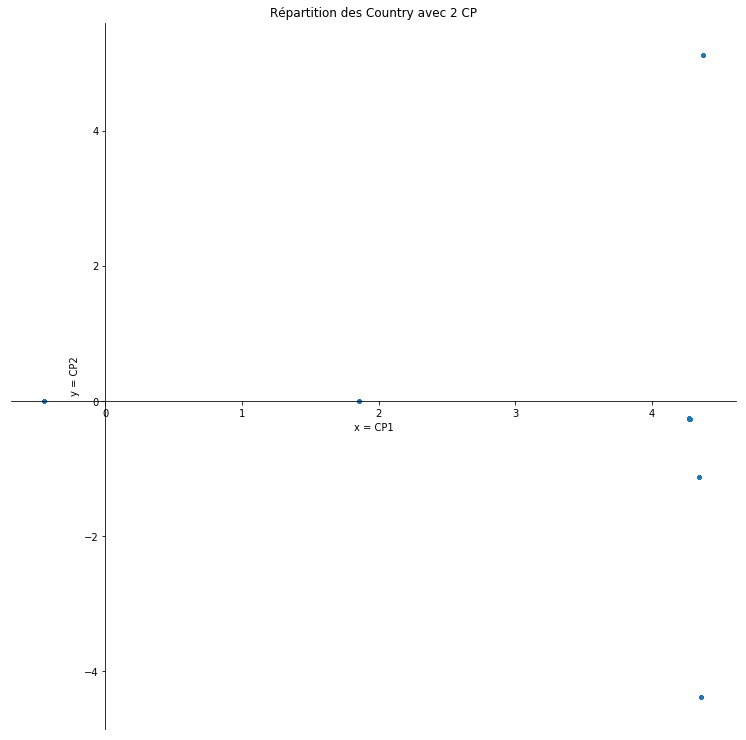

In [90]:
ig = plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title('Répartition des Country avec 2 CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(Countr_OK_prepro_trans[:,0], Countr_OK_prepro_trans[:,1], marker='.')

(-1, 1)

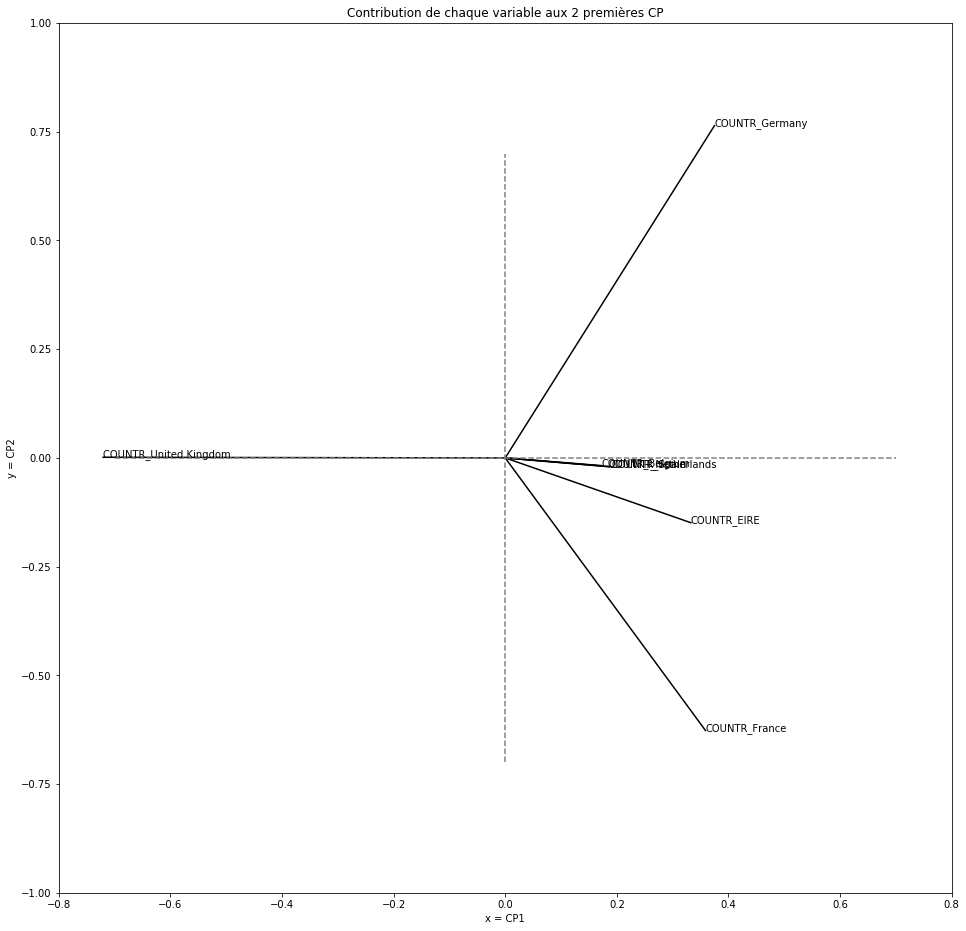

In [91]:
pcs2 = pca2.components_

fig = plt.figure(figsize=(16,16))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs2[0, :], pcs2[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, Countr_OK.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.8, 0.8])
plt.ylim([-1, 1])

<strong> Analyse frequentielle 'Customer ID'

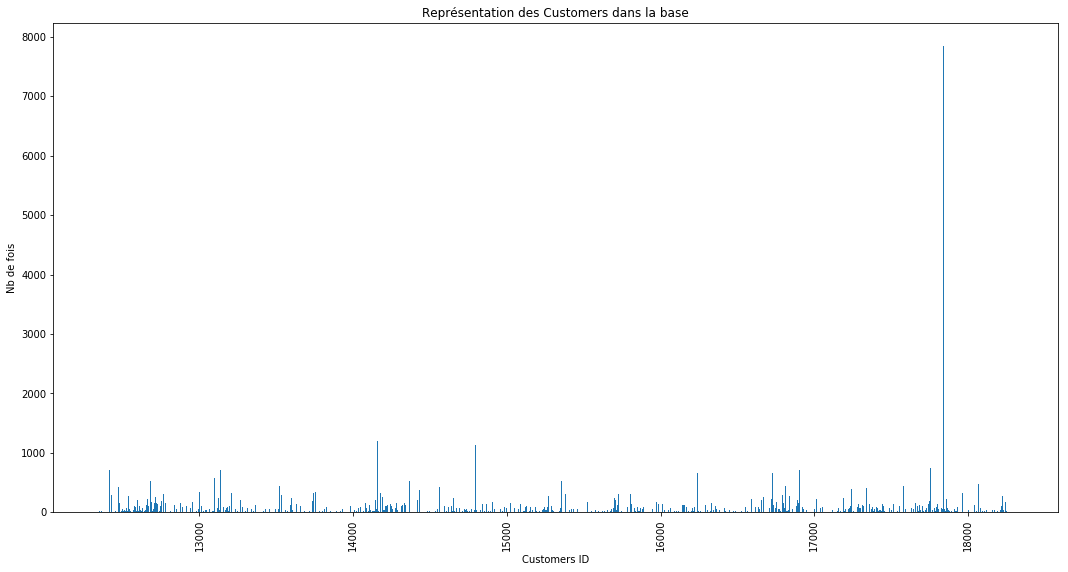

In [92]:
plt.figure(figsize=(18,9))
ax = plt.subplot()
ax.set_title("Représentation des Customers dans la base")
plt.xlabel('Customers ID') 
plt.ylabel("Nb de fois") 
plt.xticks(rotation='vertical')      

freq_id = Counter(data_client['CustomerID'])
freq_id = pd.DataFrame.from_dict(freq_id, orient='index').reset_index()
freq_id = freq_id.sort_values(by=[0], ascending=False)

plt.bar(freq_id['index'],freq_id[0])
plt.show()

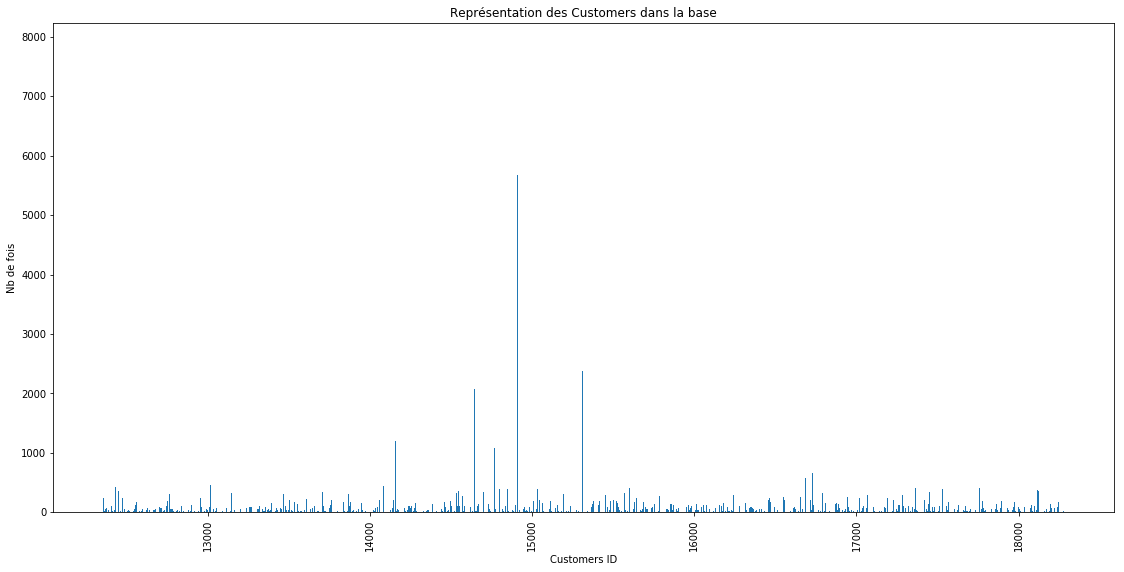

In [93]:
plt.figure(figsize=(19,9))
ax = plt.subplot()
ax.set_title("Représentation des Customers dans la base")
plt.xlabel('Customers ID') 
plt.ylabel("Nb de fois") 
plt.xticks(rotation='vertical')      

freq_id = Counter(data_client['CustomerID'])
freq_id = pd.DataFrame.from_dict(freq_id, orient='index')
freq_id = freq_id.sort_values(by=[0], ascending=False)

plt.bar(freq_id.index,freq_id[0])
plt.show()

In [94]:
test = max(freq_id[0])
test

7838

<span style="color:#3366ff"> biggest customers

In [95]:
freq_id.head(10)

,0
17841.0,7838
14911.0,5675
14096.0,5111
12748.0,4581
14606.0,2699
15311.0,2379
14646.0,2080
13089.0,1818
13263.0,1673
14298.0,1637


# Database Saving

<strong> Base OK: 'InvoiceNo','CustomerID','Quantity','InvoiceDate','UnitPrice'

In [96]:
data_clean_OK = pd.DataFrame(data_client,columns = ['InvoiceNo',
                                                   'CustomerID',
                                                   'Quantity', 
                                                   'InvoiceDate', 
                                                   'UnitPrice'])

In [97]:
data_clean_OK.to_csv(path_or_buf='DATA_clean/data_Client.csv')

# CONCLUSION

<span style="color:#3366ff"> After this cleaning phase, the following parameters are kept:     
<span style="color:#3366ff"> 'InvoiceNo',    
<span style="color:#3366ff"> 'CustomerID',    
<span style="color:#3366ff"> 'Quantity',     
<span style="color:#3366ff"> 'InvoiceDate',     
<span style="color:#3366ff"> 'UnitPrice'.